##Karla González Sánchez | A01541526

En este notebook, se resuelve una tarea de clasificación utilizando el conjunto de datos Fashion MNIST. Se entrena una red neuronal para identificar y clasificar imágenes en una de las 10 clases diferentes. Estas clases son 'T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', y 'Ankle boots'. Nuestro modelo aprenderá a reconocer y asignar automáticamente una etiqueta a cada imagen según su contenido.

###Importar Tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

###Preparar dataset Fashion MNIST
Se hace la carga de datos y se normalizan los valores de pixeles de las imágenes dividiéndolos por 255. Esto escala los valores de pixeles en el rango [0, 1].

In [ ]:
(train_images, train_labels), (test_images, test_labels)=datasets.fashion_mnist.load_data()

#Normalizar
train_images, test_images = train_images/255.0, test_images/255.0

###Validación de datos

Se define una lista `class_names` que contiene los nombres de las clases a las que pertenecen las imágenes en el conjunto de datos `Fashion MNIST`. Posteriormente, se crea una figura para visualizar las primeras 25 imágenes del conjunto de entrenamiento, junto con sus etiquetas correspondientes.

<function matplotlib.pyplot.show(close=None, block=None)>

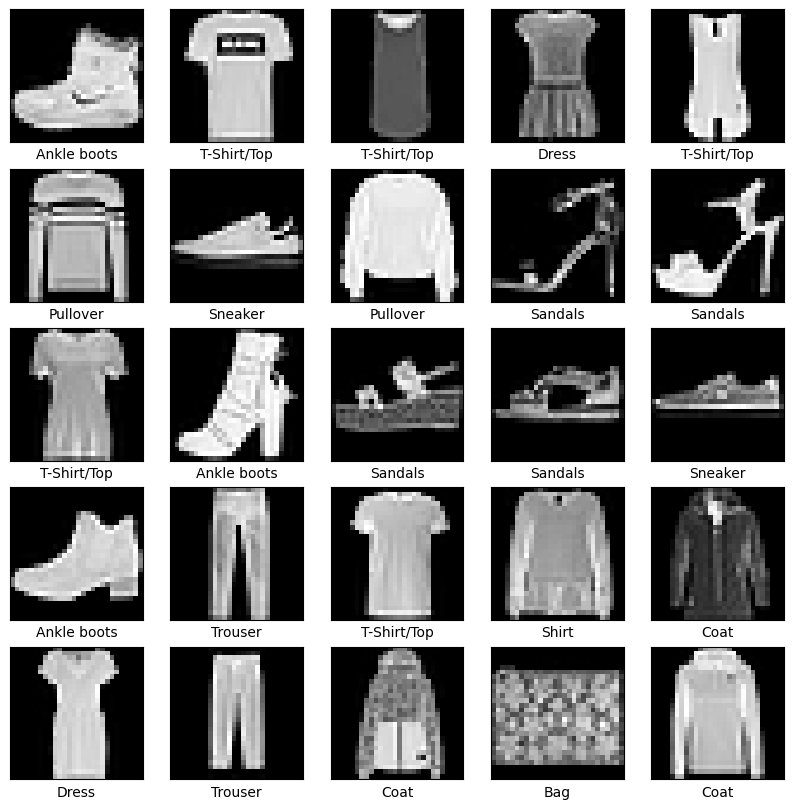

In [ ]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])

plt.show

###Capas de convolución
Se define un modelo donde la arquitectura de la CNN está compuesta por tres capas convolucionales seguidas de capas de max-pooling. Importante mencionar que **se definió un solo canal de color al trabajar con imágenes en escala de grises.**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

###Arquitectura
Cada capa convolucional aplica filtros para extraer características de la entrada, y las capas de max-pooling reducen la dimensionalidad espacial de las características extraídas. La salida final de esta parte de la red será un tensor con forma (None, 3, 3, 64), que luego puede alimentarse a capas adicionales para realizar tareas específicas, como en este caso la clasificación de objetos en imágenes.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

###Capas densas
Tres capas convolucionales seguidas de capas de max-pooling, una capa de aplanamiento y dos capas densas. Está diseñado para la clasificación en 10 clases diferentes

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(54, activation = 'relu'))
model.add(layers.Dense(10, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

###Entrenamiento
Se compila el modelo especificando el optimizador, la función de pérdida y las métricas que se utilizarán durante el entrenamiento. En este caso, Adam y la función de pérdida de Sparce Categorical Crossentropy. Además, Se entrena el modelo utilizando los datos de entrenamiento y validación. El modelo se entrena durante **10 épocas.**

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5105 - accuracy: 0.8140 - val_loss: 0.3772 - val_accuracy: 0.8616
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3300 - accuracy: 0.8807 - val_loss: 0.3311 - val_accuracy: 0.8802
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2845 - accuracy: 0.8957 - val_loss: 0.3049 - val_accuracy: 0.8879
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2547 - accuracy: 0.9064 - val_loss: 0.2898 - val_accuracy: 0.8946
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2284 - accuracy: 0.9145 - val_loss: 0.2761 - val_accuracy: 0.9006
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2078 - accuracy: 0.9228 - val_loss: 0.2687 - val_accuracy: 0.9025
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1913 - accuracy: 0.9295 - val_loss: 0.2556 - val_accuracy

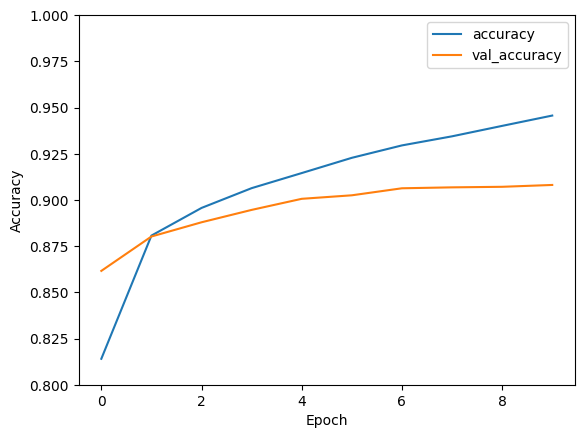

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend()

###Predicción

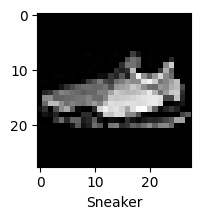

In [ ]:
# numero de imagen
n = 70
plt.figure(figsize=(2,2))
plt.imshow(test_images[n], cmap='gray')
plt.xlabel(class_names[test_labels[n]])
plt.show()

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np

print("La imagen pertenece al grupo {} con una probabilidad de {:.2f} %"
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 1s 2ms/step
[2.8693873e-01 1.9190457e-03 6.4140663e-04 3.6224336e-04 2.0696459e-02
 3.7767615e-02 2.7422470e-03 9.9998009e-01 1.9112000e-02 8.2223505e-01]
La imagen pertenece al grupo Sneaker con una probabilidad de 100.00 %


El modelo tiene un excelente rendimiento en la clasificación de las imágenes contenidas en el dataset. Con un accuaracy del 94.56% y val_accuracy de 90.81% por lo que aunque de forma mínima, el modelo nos puede dar predicciones incorrectas.